# Analyzing and Visualizing Top Soccer Data

Author: Maria Avalos

Course Project, UC Irvine, Math 10, F22

## Introduction
![](european-leagues-1536x960.jpg)
Soccer has widely been known to be a global sport. Even those who are not familiar with it may recognize the names of some of the greates players, such as Lionel Messi or Javier "Chicharito" Hernandez. Anyone who is familiar with the sport may also recognize what the top teams are of their respective league, such as F.C. Barcelona for the spanish leage 'La Liga' or Manchester City for the English leage 'the Premier League'. However what makes these teams to be able to constantly rank at the top? What could be the keys to their success.
In this project, I explore data from the top European leagues to see what factors are affecting them the most to get theri high rankings using Regression models. I also explore where the top soccer teams are likely to score a goal to see get insight on success rates.

## Importing and Cleaning the Data

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("EUClubSoccerStats.csv")
df

,Key,Team,League,Season,Rank,Games,Wins,Draws,Losses,Points,...,Nutmegs,Controlled,DistMovedWithBall,ProgressiveDistMoved,ProgC,ProgressiveIntoFinalThird,ProgressiveInto18Yard,Miscontrols,MiscontrolsAfterTackle,ProgressivePassReceived
0,Chelsea DL 2009/2010,Chelsea,Premier League,2009/2010,1.0,38.0,27.0,5.0,6.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Manchester United DL 2009/2010,Manchester United,Premier League,2009/2010,2.0,38.0,27.0,4.0,7.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tottenham DL 2009/2010,Tottenham,Premier League,2009/2010,4.0,38.0,21.0,7.0,10.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal DL 2009/2010,Arsenal,Premier League,2009/2010,3.0,38.0,23.0,6.0,9.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aston Villa DL 2009/2010,Aston Villa,Premier League,2009/2010,6.0,38.0,17.0,13.0,8.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,Shakhtar Donetsk CL 2021/2022,Shakhtar Donetsk,Champions League,2021/2022,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,FC Porto CL 2021/2022,FC Porto,Champions League,2021/2022,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,Dynamo Kyiv CL 2021/2022,Dynamo Kyiv,Champions League,2021/2022,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1688,Besiktas CL 2021/2022,Besiktas,Champions League,2021/2022,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#checking if contains missing values
df.isnull().values.any()

True

Being that this is a pretty big DataFrame, it can be easy to miss but there are a good amount of missing values so we will clean it up. We will also drop the `Key` column as it won't be needed.

In [4]:
df = df.dropna(axis=0).copy()
df = df.drop("Key", axis=1)
df.shape

(490, 92)

Since I want to investigate what factors effect a teams overall rank, I will first find the correlation among the dataset to the `Rank` and then create a sub-Dataframe containing those top factors as long as they are not repettive. Since `Rank` is from 1 being best to bigger number being worst, I have to check the 'negative' correlations as those will be the best. After finding it I will create my final Dataframe containing the averages stats of each team over the seasons to not overwhelm the data.

In [5]:
df.corr()["Rank"].sort_values(ascending=True).head(60)

Points                         -0.924545
Wins                           -0.915971
GoalDifference                 -0.913896
GoalsPerGame                   -0.812842
GoalsFor                       -0.804184
Goals                          -0.804063
TotalAssistPerGame             -0.784689
PenaltyAreaGoalsPerGame        -0.775376
OpenPlayGoals                  -0.773372
OtherAssistPerGame             -0.756561
ShotsOnTargetPer90             -0.722137
ShotsOnTarget                  -0.719465
LiveTouches                    -0.710984
Touches                        -0.708811
TotalPassesPerGame             -0.708256
TouchesAttPen                  -0.707056
ShortPassesPerGame             -0.703834
TouchesMidThird                -0.703194
AccShortPassesPerGame          -0.698008
TouchesAttThird                -0.697620
Controlled                     -0.696267
ProgC                          -0.695692
PenaltyAreaShotsPerGame        -0.688037
ShortKeyPassesPerGame          -0.685713
TotalKeyPassesPe

In [6]:
df_sub = df.loc[:,['Team', 'League', 'Rank','Points', 'Wins', 'GoalDifference', 'GoalsPerGame','TotalAssistPerGame','OtherAssistPerGame', 'ShotsOnTargetPer90','Touches', 'TotalPassesPerGame','ShortPassesPerGame','TotalKeyPassesPerGame', 'DistMovedWithBall','TotalShotsPerGame','PassSuccess','Possession','SuccessfulDribblesPerGame']]
df_sub

,Team,League,Rank,Points,Wins,GoalDifference,GoalsPerGame,TotalAssistPerGame,OtherAssistPerGame,ShotsOnTargetPer90,Touches,TotalPassesPerGame,ShortPassesPerGame,TotalKeyPassesPerGame,DistMovedWithBall,TotalShotsPerGame,PassSuccess,Possession,SuccessfulDribblesPerGame
160,Manchester City,Premier League,1.0,100.0,32.0,79.0,2.8,2.2,1.4,6.710526,896.1,743.2,699,13.2,3119.5,17.5,89.0,66.4,13.2
161,Liverpool,Premier League,4.0,75.0,21.0,46.0,2.2,1.5,1.1,6.000000,768.5,604.3,546,12.9,2654.0,16.8,83.8,58.0,11.6
162,Manchester United,Premier League,2.0,81.0,25.0,40.0,1.8,1.4,0.9,4.631579,692.6,528.0,470,9.9,2285.4,13.5,83.6,53.9,12.3
163,Tottenham,Premier League,3.0,77.0,23.0,38.0,1.9,1.3,0.7,5.578947,743.9,570.0,509,12.3,2507.2,16.4,83.8,58.8,11.5
164,Chelsea,Premier League,5.0,70.0,21.0,24.0,1.6,1.1,0.6,5.500000,722.3,559.6,509,12.8,2534.3,15.9,84.3,54.4,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Bochum,Bundesliga,13.0,42.0,12.0,-14.0,1.2,0.7,0.4,4.117647,533.4,368.0,290,8.4,1600.8,12.1,72.1,44.5,6.8
1270,Augsburg,Bundesliga,14.0,38.0,10.0,-17.0,1.1,0.8,0.4,3.411765,507.6,336.5,274,7.7,1535.4,10.8,72.0,40.6,7.7
1271,Arminia Bielefeld,Bundesliga,17.0,28.0,5.0,-26.0,0.8,0.5,0.3,3.264706,521.2,356.8,294,7.3,1399.2,10.7,71.7,39.9,8.4
1272,Hertha Berlin,Bundesliga,16.0,33.0,9.0,-34.0,1.1,0.7,0.4,3.500000,541.1,370.0,317,8.0,1526.9,10.8,74.7,43.2,8.3


In [7]:
#taking average stats of every team for further analysis
df_avg = df_sub.groupby(["Team",'League'], sort=False, as_index=False).mean()
df_avg

,Team,League,Rank,Points,Wins,GoalDifference,GoalsPerGame,TotalAssistPerGame,OtherAssistPerGame,ShotsOnTargetPer90,Touches,TotalPassesPerGame,ShortPassesPerGame,TotalKeyPassesPerGame,DistMovedWithBall,TotalShotsPerGame,PassSuccess,Possession,SuccessfulDribblesPerGame
0,Manchester City,Premier League,1.200000,91.600000,29.200000,68.400000,2.56,1.800000,1.180000,6.326316,839.060000,699.600000,655.200000,13.680000,3135.80,17.940000,89.280000,64.40,12.300000
1,Liverpool,Premier League,2.400000,86.400000,26.200000,51.800000,2.20,1.540000,0.980000,5.784211,775.880000,622.900000,568.000000,12.420000,2531.54,16.540000,84.620000,59.70,10.180000
2,Manchester United,Premier League,3.800000,69.000000,19.800000,22.000000,1.72,1.220000,0.800000,5.068421,673.700000,522.900000,473.400000,10.440000,2309.72,13.760000,83.420000,53.68,10.600000
3,Tottenham,Premier League,4.800000,68.000000,20.400000,26.400000,1.78,1.220000,0.780000,4.757895,678.520000,525.420000,473.600000,9.960000,2216.80,13.360000,83.040000,54.04,10.700000
4,Chelsea,Premier League,3.800000,69.800000,20.400000,25.600000,1.72,1.220000,0.700000,5.273684,767.220000,614.900000,567.600000,12.280000,2666.84,15.700000,86.240000,58.60,11.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Union Berlin,Bundesliga,7.666667,49.333333,13.333333,-1.333333,1.40,0.966667,0.533333,4.078431,550.766667,388.566667,324.666667,8.566667,1621.00,11.866667,73.433333,36.00,6.966667
131,Paderborn,Bundesliga,18.000000,20.000000,4.000000,-37.000000,1.10,0.800000,0.500000,3.823529,577.000000,394.900000,344.000000,9.000000,2019.20,12.700000,77.800000,46.90,11.200000
132,Arminia Bielefeld,Bundesliga,16.000000,31.500000,7.000000,-26.000000,0.80,0.500000,0.300000,3.102941,533.100000,373.250000,307.500000,7.050000,1469.15,10.250000,73.150000,42.00,7.650000
133,Bochum,Bundesliga,13.000000,42.000000,12.000000,-14.000000,1.20,0.700000,0.400000,4.117647,533.400000,368.000000,290.000000,8.400000,1600.80,12.100000,72.100000,44.50,6.800000


In [8]:
#example visualization with one of those top factors
alt.Chart(df_avg).mark_circle().encode(
    x= alt.X('Rank', scale=alt.Scale(domain=(1,21),reverse=True)),
    y='Wins',
    color="League:N",
    tooltip = ["Team", 'Rank','League']
)

alt.Chart(...)

## Predicting Factor Importance to Team Ranking

Since I want to explore what factors are most important to a team to achieve higher ranking, in other words what factors make the top teams stay at the top,I decided to use regression to be able to find associations between these two things.

### Decision Tree Regression

In [9]:
#getting the features we are going to use for predicition
features = [col for col in df_avg.columns if is_numeric_dtype(df_avg[col]) & (col!='Rank') & (col!='Team')& (col!='League')& (col!='Season')]
features

['Points',
 'Wins',
 'GoalDifference',
 'GoalsPerGame',
 'TotalAssistPerGame',
 'OtherAssistPerGame',
 'ShotsOnTargetPer90',
 'Touches',
 'TotalPassesPerGame',
 'ShortPassesPerGame',
 'TotalKeyPassesPerGame',
 'DistMovedWithBall',
 'TotalShotsPerGame',
 'PassSuccess',
 'Possession',
 'SuccessfulDribblesPerGame']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_avg[features], df_avg["Rank"], test_size=0.6, random_state=2868)

As we are aware that decision trees can denote problems such as overfitting or underfitting,we can create a u-shaped error model to find the best number of leaf nodes. This configuration was adapted a [previous student]((https://christopherdavisuci.github.io/UCI-Math-10-S22/Proj/StudentProjects/TianyiChen.html#decision-tree)) and this [site](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/).

In [11]:
train_error_dict = {}
test_error_dict = {}
for n in range(2,80):
    reg = DecisionTreeRegressor(max_leaf_nodes=n,random_state=2868)
    reg.fit(X_train, y_train)
    train_error_dict[n]= mean_squared_error(y_train, reg.predict(X_train))
    test_error_dict[n]= mean_squared_error(y_test, reg.predict(X_test))

In [12]:
df_train = pd.DataFrame({"y":train_error_dict, "type": "train"})
df_test = pd.DataFrame({"y":test_error_dict, "type": "test"})
df_error = pd.concat([df_train, df_test]).reset_index()

In [13]:
alt.Chart(df_error).mark_line(clip=True).encode(
    x="index:O",
    y="y",
    color="type"
)

alt.Chart(...)

As we can see, n=6,7,8 are roughly where the best model is. Let's use this and hope our numbers look nice.

In [14]:
reg = DecisionTreeRegressor(max_leaf_nodes=6)

In [15]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6)

In [16]:
reg.score(X_train, y_train)

0.953148281700124

In [17]:
reg.score(X_test, y_test)

0.8893122172264274

In [18]:
pd.Series(reg.feature_importances_, index=features).sort_values(ascending=False)

Wins                         0.854781
GoalDifference               0.128957
Points                       0.016262
GoalsPerGame                 0.000000
TotalAssistPerGame           0.000000
OtherAssistPerGame           0.000000
ShotsOnTargetPer90           0.000000
Touches                      0.000000
TotalPassesPerGame           0.000000
ShortPassesPerGame           0.000000
TotalKeyPassesPerGame        0.000000
DistMovedWithBall            0.000000
TotalShotsPerGame            0.000000
PassSuccess                  0.000000
Possession                   0.000000
SuccessfulDribblesPerGame    0.000000
dtype: float64

Lots of zero values.

In [19]:
df_importance = pd.DataFrame({"Importance": reg.feature_importances_, "Feature": reg.feature_names_in_})

In [20]:
alt.Chart(df_importance).mark_bar().encode(
    x="Importance",
    y="Feature",
    tooltip=["Importance", "Feature"],
).properties(
    title="Importance of factors affecting Team Rankings",
    width = 900
)

alt.Chart(...)

As we can see, this is not really that intersting. Of course realistically, it does make sense that the more `Wins` ones has, the higher their ranking. Let's try for bigger nodes to see if we get more intersting results just for fun.

In [21]:
reg_fun = DecisionTreeRegressor(max_leaf_nodes=80)

In [22]:
reg_fun.fit(X_train, y_train)


DecisionTreeRegressor(max_leaf_nodes=80)

In [23]:
reg_fun.score(X_train, y_train)

1.0

In [24]:
reg_fun.score(X_test, y_test)

0.8493453236070818

In [25]:
pd.Series(reg_fun.feature_importances_, index=features).sort_values(ascending=False)

Wins                         0.772807
GoalDifference               0.125750
TotalShotsPerGame            0.048440
GoalsPerGame                 0.019328
Points                       0.015886
ShotsOnTargetPer90           0.005787
TotalAssistPerGame           0.002781
ShortPassesPerGame           0.002617
Possession                   0.002148
TotalPassesPerGame           0.001828
PassSuccess                  0.001123
SuccessfulDribblesPerGame    0.000797
Touches                      0.000498
DistMovedWithBall            0.000180
OtherAssistPerGame           0.000030
TotalKeyPassesPerGame        0.000000
dtype: float64

In [26]:
df_importance = pd.DataFrame({"Importance": reg_fun.feature_importances_, "Feature": reg_fun.feature_names_in_})

In [27]:
d_tree = alt.Chart(df_importance).mark_bar().encode(
    x="Importance",
    y="Feature",
    tooltip=["Importance", "Feature"],
).properties(
    title="Importance of factors affecting Team Ranking Using DecisionTree",
    width = 900
)
d_tree

alt.Chart(...)

### Random Forest Regression

Random Forest regression can sometimes help with the problem of overfitting since they combine the output of multiple decision trees to come up with the final prediciton. So I've decided to test it out and see if I'd be given a different result. Let's check our error curve first.

In [28]:
train_error_dict = {}
test_error_dict = {}
for n in range(2,25):
    rfe = RandomForestRegressor(n_estimators=1000,max_leaf_nodes=n,random_state=2868)
    rfe.fit(X_train, y_train)
    train_error_dict[n]= mean_squared_error(y_train, rfe.predict(X_train))
    test_error_dict[n]= mean_squared_error(y_test, rfe.predict(X_test))

In [29]:
df_train = pd.DataFrame({"y":train_error_dict, "type": "train"})
df_test = pd.DataFrame({"y":test_error_dict, "type": "test"})
df_error = pd.concat([df_train, df_test]).reset_index()

In [30]:
alt.Chart(df_error).mark_line(clip=True).encode(
    x="index:O",
    y="y",
    color="type"
)

alt.Chart(...)

As we can see, we really only need `n` to be about 4 or 5 so we will have that in our first run.

In [31]:
rfe = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=5,random_state=2868)

In [32]:
rfe.fit(X_train,y_train)

RandomForestRegressor(max_leaf_nodes=5, n_estimators=1000, random_state=2868)

In [33]:
rfe.score(X_train,y_train)

0.9631823907907027

In [34]:
rfe.score(X_test,y_test)

0.905822639881225

In [35]:
df_importance1 = pd.DataFrame({"importance": rfe.feature_importances_, "feature": rfe.feature_names_in_})

In [36]:
pd.Series(rfe.feature_importances_, index=features).sort_values(ascending=False)

Wins                         0.406344
Points                       0.261425
GoalDifference               0.162745
GoalsPerGame                 0.039579
TotalPassesPerGame           0.026745
TotalAssistPerGame           0.020673
Touches                      0.018476
ShortPassesPerGame           0.017766
PassSuccess                  0.011185
OtherAssistPerGame           0.006909
Possession                   0.006747
DistMovedWithBall            0.005791
TotalShotsPerGame            0.005604
TotalKeyPassesPerGame        0.005341
ShotsOnTargetPer90           0.004300
SuccessfulDribblesPerGame    0.000371
dtype: float64

We can already see better number results (no zero values).

In [37]:
rand_for = alt.Chart(df_importance1).mark_bar().encode(
    x="importance",
    y="feature",
    tooltip=["importance", "feature"],
).properties(
    title="Importance of factors affecting Blue's win using RandomForest",
    width = 900
)
rand_for

alt.Chart(...)

In [38]:
#comparison between the twoo
d_tree|rand_for

alt.HConcatChart(...)

Overall, it is safe to conclude that based on the feature importances that I did to the data, `Wins` clearly are what affect a team's ranking the most followed by `Points` and `GoalDifference`.

## Visualizing Top Team Insights

As we saw from my results, it appears that the amount of `Wins` a team gets, on average, throughout their season. But since soccer is a overall sport where one thing is affected by another (ex:rank is affected by wins which is affected by goals scored), I wanted to analyze where the Top Teams of two different leagues are more likely to score in hopes of demonstrating where one should attempt to score to get more points or getting some type of insight on their key to success.

### Shot Map

Here I will create two DataFrames containing the top 10 teams from La Liga, the Spanish league, and the Premier League, the English league.

In [39]:
liga = df[(df['League'] == 'La Liga') & (df['Rank']<= 10)]
liga = liga.loc[:,['Team','Rank','SixYardGoalsPerGame','PenaltyAreaGoalsPerGame','OutOfBoxGoalsPerGame']]
liga

,Team,Rank,SixYardGoalsPerGame,PenaltyAreaGoalsPerGame,OutOfBoxGoalsPerGame
420,Barcelona,1.0,0.6,1.6,0.3
421,Real Madrid,3.0,0.4,1.7,0.3
422,Atletico Madrid,2.0,0.2,1.1,0.2
423,Valencia,4.0,0.4,1.0,0.3
424,Villarreal,5.0,0.3,1.0,0.2
426,Sevilla,7.0,0.2,0.9,0.2
428,Real Betis,6.0,0.3,0.9,0.2
430,Girona,10.0,0.3,0.9,0.1
432,Eibar,9.0,0.3,0.7,0.2
434,Getafe,8.0,0.2,0.6,0.3


In [40]:
premier = df[(df['League'] == 'Premier League') & (df['Rank']<= 10)]
premier = premier.loc[:,['Team','Rank','SixYardGoalsPerGame','PenaltyAreaGoalsPerGame','OutOfBoxGoalsPerGame']]
premier

,Team,Rank,SixYardGoalsPerGame,PenaltyAreaGoalsPerGame,OutOfBoxGoalsPerGame
160,Manchester City,1.0,0.7,1.7,0.3
161,Liverpool,4.0,0.4,1.5,0.2
162,Manchester United,2.0,0.3,1.1,0.3
163,Tottenham,3.0,0.4,1.2,0.3
164,Chelsea,5.0,0.3,1.0,0.3
165,Arsenal,6.0,0.4,1.4,0.2
167,Burnley,7.0,0.2,0.6,0.1
168,Leicester,9.0,0.4,0.8,0.2
170,Newcastle,10.0,0.3,0.6,0.1
173,Everton,8.0,0.2,0.7,0.2


Unfortunately, this data did not come with the coordinates to plot where these shots were taken for our [shot map](https://towardsdatascience.com/how-to-analyze-football-event-data-using-python-2f4070d551ff) we will have to create our own. Luckily, there are statistics on where on the field the team averaged to score per game so we can create a rough estimate.

In [41]:
#points for 'La Liga' teams
y_s = [random.randint(114,120) for i in range(50)]
liga['y_s'] = y_s
x_s= [random.randint(30,50) for i in range(50)]
liga['x_s'] = x_s
y_p = [random.randint(104,114) for i in range(50)]
liga['y_p'] = y_p
x_p = [random.randint(0,80) for i in range(50)]
liga['x_p'] = x_p
y_o = [random.randint(80,100) for i in range(50)]
liga['y_o'] = y_o
x_o = [random.randint(0,80) for i in range(50)]
liga['x_o'] = x_o

In [42]:
#points for 'Premier League' Teams
y_s = [random.randint(114,120) for i in range(50)]
premier['y_s'] = y_s
x_s= [random.randint(30,50) for i in range(50)]
premier['x_s'] = x_s
y_p = [random.randint(104,114) for i in range(50)]
premier['y_p'] = y_p
x_p = [random.randint(0,80) for i in range(50)]
premier['x_p'] = x_p
y_o = [random.randint(80,100) for i in range(50)]
premier['y_o'] = y_o
x_o = [random.randint(0,80) for i in range(50)]
premier['x_o'] = x_o

In [43]:
#size of points to be the amount of times they scored
size_s = liga['SixYardGoalsPerGame'].to_numpy()
s_s = [1000*s_s**2 for s_s in size_s]
size_p = liga['PenaltyAreaGoalsPerGame'].to_numpy()
s_p = [1000*s_p**2 for s_p in size_p]
size_o = liga['OutOfBoxGoalsPerGame'].to_numpy()
s_o = [1000*s_o**2 for s_o in size_o]

In [44]:
size_s = premier['SixYardGoalsPerGame'].to_numpy()
s_s = [1000*s_s**2 for s_s in size_s]
size_p = premier['PenaltyAreaGoalsPerGame'].to_numpy()
s_p = [1000*s_p**2 for s_p in size_p]
size_o = premier['OutOfBoxGoalsPerGame'].to_numpy()
s_o = [1000*s_o**2 for s_o in size_o]

Looking at analysis that have been done with soccer statistics I found [this website](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html) that has a program that assists with creating visualizations so that is what I will use.

In [45]:
#install the program for graphics
!pip install mplsoccer==1.1.9

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [46]:
from mplsoccer.pitch import VerticalPitch

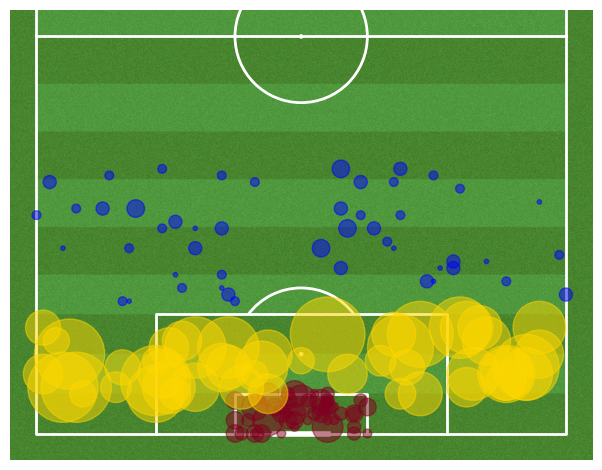

In [47]:
pitch = VerticalPitch(half=True,pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.gca().invert_yaxis()
#scatter plot of goal locations
plt.scatter(liga['x_s'],liga['y_s'],s=s_s, c = "#800020",alpha=0.5)
plt.scatter(liga['x_p'],liga['y_p'],s=s_p, c = "#FFD700",alpha=0.5)
plt.scatter(liga['x_o'],liga['y_o'],s=s_o, c = "#0000FF",alpha=0.5)

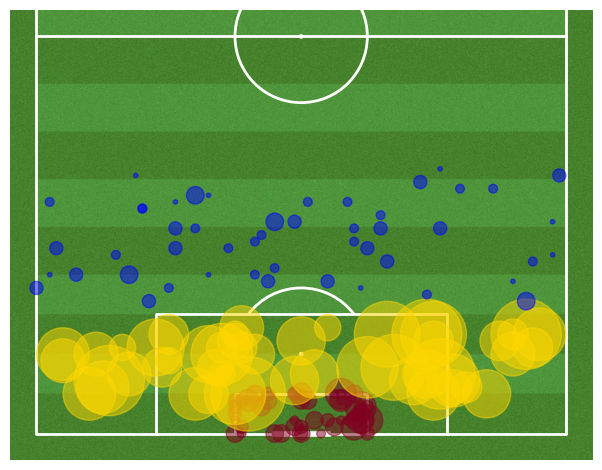

In [48]:
pitch = VerticalPitch(half=True,pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.gca().invert_yaxis()
#scatter plot of goal locations
plt.scatter(premier['x_s'],premier['y_s'],s=s_s, c = "#800020",alpha=0.5)
plt.scatter(premier['x_p'],premier['y_p'],s=s_p, c = "#FFD700",alpha=0.5)
plt.scatter(premier['x_o'],premier['y_o'],s=s_o, c = "#0000FF",alpha=0.5)

Both top teams from both leagues seem to have the most success making a goal if they shoot anywhere in the penalty area distance as this is wheere the points are the biggest.

### Heat Map

Another visualization that can help us is a heat map to see where the most activity is happening. Let's try.

In [49]:
#getting the goal point locations only
x_points = liga.melt(value_vars = ['x_s','x_p','x_o'])
y_points = liga.melt(value_vars = ['y_s','y_p','y_o'])
liga_pts = pd.DataFrame({'x_points':x_points['value'],'y_points':y_points['value']})

In [50]:
x_points = premier.melt(value_vars = ['x_s','x_p','x_o'])
y_points = premier.melt(value_vars = ['y_s','y_p','y_o'])
premier_pts = pd.DataFrame({'x_points':x_points['value'],'y_points':y_points['value']})

<AxesSubplot:xlabel='x_points', ylabel='y_points'>

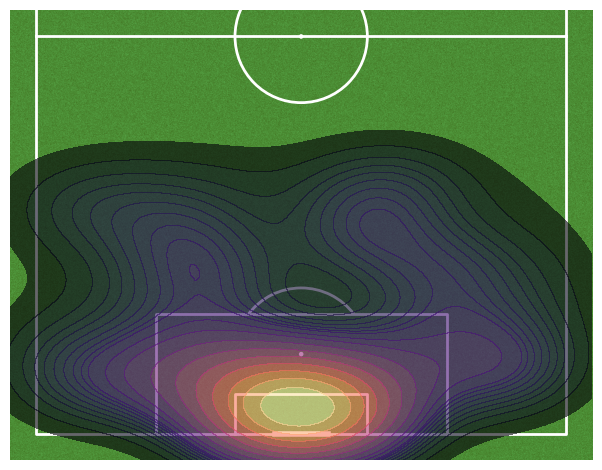

In [51]:
pitch = VerticalPitch(half=True,pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
plt.gca().invert_yaxis()
#heat map
kde1 = sns.kdeplot(
    x = liga_pts['x_points'],
    y = liga_pts['y_points'],
    levels=20,
    fill=True,
    alpha=0.6,
    cmap = 'magma'
)
kde1

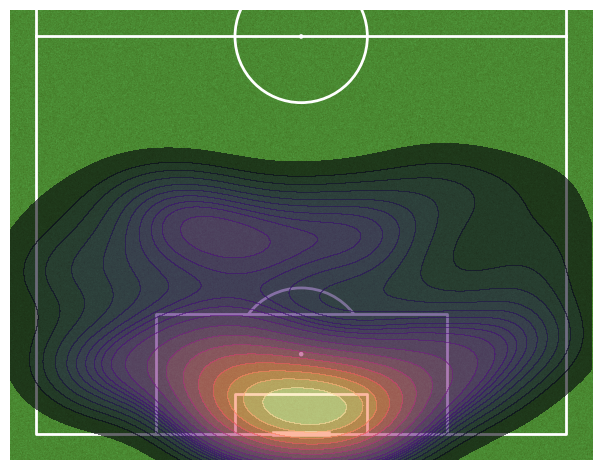

In [52]:
pitch = VerticalPitch(half=True,pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
plt.gca().invert_yaxis()
#heat map
kde2 = sns.kdeplot(
    x = premier_pts['x_points'],
    y = premier_pts['y_points'],
    levels=20,
    fill=True,
    alpha=0.6,
    cmap = 'magma'
)

Proving our initial scatter plot conclusion, here we can see that indeed, most of the activity when scoring goals happens `Six Yards` from the goal post and the `Penalty Area`.

## Summary

After testing using two different models, DecisionTree Regression and RandomForest Regression, I was able to get an insight on what are the most important factors that affect a teams rankings. Clearly the top teams are the top teams because they Win and Score the most. Goal difference is also important, which makes sense as scoring the most is not important if you are getting scored on just as much, cancelling out any progress.
I was also able to conclude, from my visualizations, that the tops teams score the most when they shoot in the 6-yard area the most followed by the penalty area.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Source : [Performance Data on Football teams 09 to 22](https://www.kaggle.com/datasets/gurpreetsdeol/performance-data-on-football-teams-09-to-22?topic=trendingDataset&sort=votes&page=6)

* List any other references that you found helpful.

* [Shot Map Inspiration](https://towardsdatascience.com/how-to-analyze-football-event-data-using-python-2f4070d551ff)
* [Shot Map python Tutorial](https://www.youtube.com/watch?v=2RhTuRWNqUc&t=634s)
* [Matplotlib soccer program](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html#sphx-glr-gallery-pitch-setup-plot-pitches-py)
* [Random Number List](https://www.tutorialspoint.com/generating-random-number-list-in-python)
* [Changing Scatterplot Marker Size](https://stackabuse.com/matplotlib-change-scatter-plot-marker-size/)
* [Seaborn KDEPlot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [U test model](https://christopherdavisuci.github.io/UCI-Math-10-S22/Proj/StudentProjects/TianyiChen.html#summary)
* [Also U test model](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)
* [Understanding Correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
* [Random Forest Inspiration/Help](https://medium.com/@nicholasutikal/predict-football-results-with-random-forest-c3e6f6e2ee58)
* [Decision Tree Regression Help](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda)



## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e6de7f7-b97c-48f2-8ed1-3ba95424bab6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>